# 1. 데이터확인하기

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from tqdm.notebook import tqdm
tqdm.pandas()

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 150)

In [2]:
url = 'https://finance.naver.com/sise/lastsearch2.naver'

In [3]:
print(url)
headers = {'user-agent' : 'Mozilla/5.0'}
print(headers['user-agent'])
response = requests.get(url,headers = headers)
response.status_code

https://finance.naver.com/sise/lastsearch2.naver
Mozilla/5.0


200

In [4]:
df_top_stocks = pd.read_html(response.text)[1]
df_top_stocks = df_top_stocks.dropna(how='all')
df_top_stocks = df_top_stocks.reset_index(drop=True)
df_top_stocks

,순위,종목명,검색비율,현재가,전일비,등락률,거래량,시가,고가,저가,PER,ROE
0,1.0,삼성전자,2.70%,71400.0,900.0,-1.24%,24125421.0,72400.0,72500.0,71000.0,10.78,17.07
1,2.0,이수화학,2.16%,26950.0,6200.0,+29.88%,9718323.0,20750.0,26950.0,20550.0,86.94,9.41
2,3.0,에코프로,1.51%,563000.0,17000.0,+3.11%,638572.0,546000.0,570000.0,546000.0,38.12,2.94
3,4.0,이수스페셜티케미컬,1.35%,107900.0,24900.0,+30.00%,149919.0,83000.0,107900.0,83000.0,NaN,NaN
4,5.0,OCI,1.24%,144500.0,21500.0,+17.48%,1220138.0,125500.0,153100.0,124800.0,NaN,NaN
5,6.0,POSCO홀딩스,1.08%,360000.0,3000.0,-0.83%,772802.0,364000.0,368000.0,360000.0,14.27,6.11
6,7.0,에코프로비엠,0.86%,249000.0,10000.0,+4.18%,1067460.0,239500.0,250000.0,239000.0,87.00,24.26
7,8.0,SK하이닉스,0.76%,108600.0,1700.0,-1.54%,7841752.0,110000.0,110900.0,108500.0,-33.94,3.56
8,9.0,카카오,0.70%,56200.0,600.0,-1.06%,1976408.0,56500.0,56900.0,56100.0,196.50,13.54
9,10.0,삼부토건,0.70%,2045.0,145.0,+7.63%,74516815.0,1869.0,2200.0,1827.0,-5.22,-35.88


In [5]:
# #contentarea > div.box_type_l > table > tbody > tr:nth-child(3) > td:nth-child(2) > a
find_tag = bs(response.text)
find_code = find_tag.select('td > a')

code = []
for i in find_tag.select('td > a'):
    code.append(i["href"].split("=")[-1])

print(code)
find_tag.select('td > a')

['005930', '005950', '086520', '457190', '456040', '005490', '247540', '000660', '035720', '001470', '016790', '373220', '035420', '066970', '003670', '180640', '091990', '005070', '001570', '263750', '203690', '036570', '035900', '007660', '006400', '371460', '302440', '196170', '137400', '066570']


[<a class="tltle" href="/item/main.naver?code=005930">삼성전자</a>,
 <a class="tltle" href="/item/main.naver?code=005950">이수화학</a>,
 <a class="tltle" href="/item/main.naver?code=086520">에코프로</a>,
 <a class="tltle" href="/item/main.naver?code=457190">이수스페셜티케미컬</a>,
 <a class="tltle" href="/item/main.naver?code=456040">OCI</a>,
 <a class="tltle" href="/item/main.naver?code=005490">POSCO홀딩스</a>,
 <a class="tltle" href="/item/main.naver?code=247540">에코프로비엠</a>,
 <a class="tltle" href="/item/main.naver?code=000660">SK하이닉스</a>,
 <a class="tltle" href="/item/main.naver?code=035720">카카오</a>,
 <a class="tltle" href="/item/main.naver?code=001470">삼부토건</a>,
 <a class="tltle" href="/item/main.naver?code=016790">카나리아바이오</a>,
 <a class="tltle" href="/item/main.naver?code=373220">LG에너지솔루션</a>,
 <a class="tltle" href="/item/main.naver?code=035420">NAVER</a>,
 <a class="tltle" href="/item/main.naver?code=066970">엘앤에프</a>,
 <a class="tltle" href="/item/main.naver?code=003670">포스코퓨처엠</a>,
 <a class="tltle" h

In [6]:
df_top_stocks["업종코드"] = code
df_top_stocks = df_top_stocks.drop("전일비", axis = 1)
df_top_stocks = df_top_stocks.drop("등락률", axis = 1)
df_top_stocks = df_top_stocks.drop("거래량", axis = 1)
df_top_stocks = df_top_stocks.drop("현재가", axis = 1)
df_top_stocks = df_top_stocks.drop("시가", axis = 1)
df_top_stocks = df_top_stocks.drop("고가", axis = 1)
df_top_stocks = df_top_stocks.drop("저가", axis = 1)
df_top_stocks = df_top_stocks.drop("PER", axis = 1)
df_top_stocks = df_top_stocks.drop("ROE", axis = 1)
df_top_stocks = df_top_stocks[["순위", "업종코드", "종목명", "검색비율"]]
df_top_stocks

,순위,업종코드,종목명,검색비율
0,1.0,005930,삼성전자,2.70%
1,2.0,005950,이수화학,2.16%
2,3.0,086520,에코프로,1.51%
3,4.0,457190,이수스페셜티케미컬,1.35%
4,5.0,456040,OCI,1.24%
5,6.0,005490,POSCO홀딩스,1.08%
6,7.0,247540,에코프로비엠,0.86%
7,8.0,000660,SK하이닉스,0.76%
8,9.0,035720,카카오,0.70%
9,10.0,001470,삼부토건,0.70%


In [7]:
stock_code = df_top_stocks["업종코드"][0]
stock_url = f"https://finance.naver.com/item/sise.naver?code={stock_code}"
stock_url

'https://finance.naver.com/item/sise.naver?code=005930'

In [8]:
response2 = requests.get(stock_url,headers = headers)
juyo_sise = pd.read_html(response2.text)[1]
juyo_sise = juyo_sise.dropna()
juyo_sise = juyo_sise.reset_index(drop=True)
juyo_sise

,0,1,2,3
0,현재가,71400,매도호가,71400
1,전일대비,하락 900,매수호가,71300
2,등락률(%),-1.24%,전일가,72300
3,거래량,24125421,시가,72400
4,거래대금(백만),1730650,고가,72500
5,액면가,100원,저가,71000
6,상한가,93900,전일상한,91300
7,하한가,50700,전일하한,49300
8,PER,10.78,EPS,6625
9,52주 최고,72300,52주 최저,51800


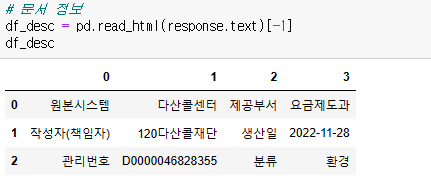
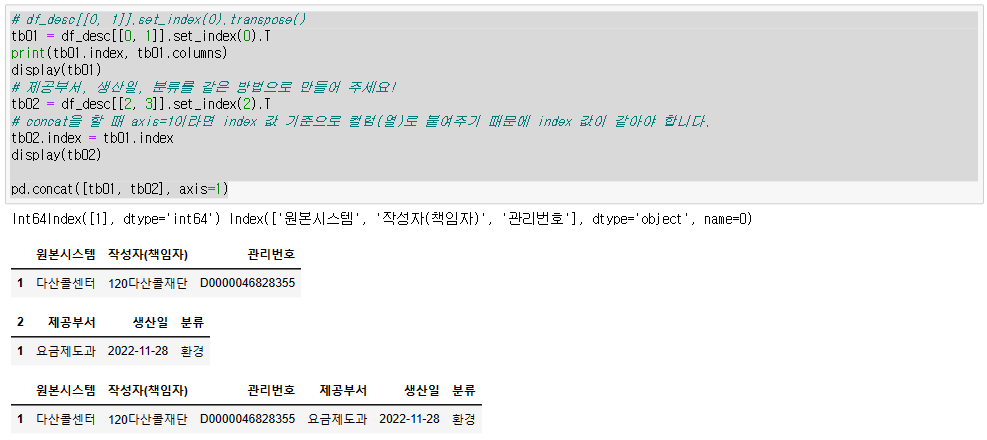

In [9]:
t1 = juyo_sise[[0,1]].set_index(0).T
t2 = juyo_sise[[2, 3]].set_index(2).T
t2.index = t1.index
juyo_sise = pd.concat([t1,t2], axis = 1)
juyo_sise

,현재가,전일대비,등락률(%),거래량,거래대금(백만),액면가,상한가,하한가,PER,52주 최고,시가총액,외국인현재,매도호가,매수호가,전일가,시가,고가,저가,전일상한,전일하한,EPS,52주 최저,상장주식수,자본금
1,71400,하락 900,-1.24%,24125421,1730650,100원,93900,50700,10.78,72300,"4,262,425억원","3,130,869천주",71400,71300,72300,72400,72500,71000,91300,49300,6625,51800,5969782550,"778,046백만"


# 여기부터 실행시키면 됩니다!

In [10]:
# 필요한 모듈 불러오기
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from tqdm.notebook import tqdm
tqdm.pandas()

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 150)

In [11]:
# 실시간 검색어 순위 가져오기
def get_top_stock():
    # url 생성
    url = 'https://finance.naver.com/sise/lastsearch2.naver'
    
    #response 받기
    headers = {'user-agent' : 'Mozilla/5.0'}
    response = requests.get(url,headers = headers)
    
    # 데이터 프레임 생성
    df_top_stocks = pd.read_html(response.text)[1]
    df_top_stocks = df_top_stocks.dropna(how='all')
    df_top_stocks = df_top_stocks.reset_index(drop=True)
    
    # 코드를 찾아서 추가하기
    find_tag = bs(response.text)   
    code = []
    for i in find_tag.select('td > a'):
        code.append(i["href"].split("=")[-1])
    
    # 불필요 데이터 제거 / 추후에 데이터를 추가 예정
    df_top_stocks["업종코드"] = code
    df_top_stocks = df_top_stocks[["순위", "업종코드", "종목명", "검색비율"]]

    return df_top_stocks

In [12]:
# 가져온 순위를 다른 변수에 넣어줍니다. df_top_stocks은 아래에서 사용됩니다
df_top_stocks = get_top_stock()
get_top_stock()

,순위,업종코드,종목명,검색비율
0,1.0,005930,삼성전자,2.70%
1,2.0,005950,이수화학,2.16%
2,3.0,086520,에코프로,1.51%
3,4.0,457190,이수스페셜티케미컬,1.35%
4,5.0,456040,OCI,1.24%
5,6.0,005490,POSCO홀딩스,1.08%
6,7.0,247540,에코프로비엠,0.86%
7,8.0,000660,SK하이닉스,0.76%
8,9.0,035720,카카오,0.70%
9,10.0,001470,삼부토건,0.70%


In [13]:
# 종목코드를 이용하여 시세 데이터 가져오기
def get_stock_sise(stock_code):
    # url 생성
    stock_url = f"https://finance.naver.com/item/sise.naver?code={stock_code}"
    headers = {'user-agent' : 'Mozilla/5.0'}
    
    #response 받기
    response2 = requests.get(stock_url,headers = headers)
    
    # 테이블 생성
    juyo_sise = pd.read_html(response2.text)[1]
    juyo_sise = juyo_sise.dropna()
    juyo_sise = juyo_sise.reset_index(drop=True)
    
    # 테이블 형태 변경
    t1 = juyo_sise[[0,1]].set_index(0).T
    t2 = juyo_sise[[2, 3]].set_index(2).T
    t2.index = t1.index
    juyo_sise = pd.concat([t1,t2], axis = 1)
   
    return juyo_sise

In [14]:
# 실시간 검색순위 별 데이터 수집
find_rank_stock = df_top_stocks['업종코드'].progress_map(get_stock_sise)
find_rank_stock = pd.concat(find_rank_stock.tolist(), ignore_index=True)
find_rank_stock

  0%|          | 0/30 [00:00<?, ?it/s]

,현재가,전일대비,등락률(%),거래량,거래대금(백만),액면가,상한가,하한가,PER,52주 최고,시가총액,외국인현재,매도호가,매수호가,전일가,시가,고가,저가,전일상한,전일하한,EPS,52주 최저,상장주식수,자본금,거래대금(천)
0,71400,하락 900,-1.24%,24125421,1730650,100원,93900,50700,10.78,72300,"4,262,425억원","3,130,869천주",71400,71300,72300,72400,72500,71000,91300,49300,6625,51800,5969782550,"778,046백만",NaN
1,26950,"상한 6,200",+29.88%,9718323,246733,"5,000원",26950,14550,86.94,63000,"6,050억원",967천주,0,26950,20750,20750,26950,20550,53900,29050,310,13100,22450795,"139,797백만",NaN
2,563000,"상승 17,000",+3.11%,638572,NaN,500원,709000,383000,38.12,820000,"149,914억원","1,069천주",563000,562000,546000,546000,570000,546000,704000,380000,14770,62067,26627668,"13,313백만",358381
3,107900,"상한 24,900",+30.00%,149919,15746,"5,000원",107900,58100,NaN,0,"5,944억원",237천주,0,107900,83000,83000,107900,83000,0,0,NaN,0,5508749,"27,543백만",NaN
4,144500,"상승 21,500",+17.48%,1220138,173824,"5,000원",159900,86100,NaN,160000,"10,746억원","1,308천주",144700,144500,123000,125500,153100,124800,183500,98900,NaN,120000,7436729,"37,183백만",NaN
5,360000,"하락 3,000",-0.83%,772802,280562,"5,000원",471500,254500,14.27,436000,"304,456억원","33,215천주",360500,360000,363000,364000,368000,360000,468500,252500,25222,211000,84571230,"482,403백만",NaN
6,249000,"상승 10,000",+4.18%,1067460,NaN,500원,310500,167500,87.00,315500,"243,525억원","9,063천주",249000,248500,239000,239500,250000,239000,309000,167000,2862,86900,97801344,"48,940백만",264109
7,108600,"하락 1,700",-1.54%,7841752,856475,"5,000원",143300,77300,-33.94,113400,"790,611억원","373,554천주",108700,108600,110300,110000,110900,108500,141900,76500,-3200,73100,728002365,"3,657,652백만",NaN
8,56200,하락 600,-1.06%,1976408,111241,100원,73800,39800,196.50,87400,"249,496억원","115,546천주",56300,56200,56800,56500,56900,56100,73500,39700,286,46500,443943687,"44,444백만",NaN
9,2045,상승 145,+7.63%,74516815,153472,"1,000원",2470,1330,-5.22,2650,"4,042억원","8,919천주",2045,2040,1900,1869,2200,1827,2670,1440,-392,1012,197673375,"197,673백만",NaN


In [15]:
# 실시간 검색순위와 시세 데이터 합치기
final_data = pd.concat([df_top_stocks,find_rank_stock], axis = 1)
final_data

,순위,업종코드,종목명,검색비율,현재가,전일대비,등락률(%),거래량,거래대금(백만),액면가,상한가,하한가,PER,52주 최고,시가총액,외국인현재,매도호가,매수호가,전일가,시가,고가,저가,전일상한,전일하한,EPS,52주 최저,상장주식수,자본금,거래대금(천)
0,1.0,005930,삼성전자,2.70%,71400,하락 900,-1.24%,24125421,1730650,100원,93900,50700,10.78,72300,"4,262,425억원","3,130,869천주",71400,71300,72300,72400,72500,71000,91300,49300,6625,51800,5969782550,"778,046백만",NaN
1,2.0,005950,이수화학,2.16%,26950,"상한 6,200",+29.88%,9718323,246733,"5,000원",26950,14550,86.94,63000,"6,050억원",967천주,0,26950,20750,20750,26950,20550,53900,29050,310,13100,22450795,"139,797백만",NaN
2,3.0,086520,에코프로,1.51%,563000,"상승 17,000",+3.11%,638572,NaN,500원,709000,383000,38.12,820000,"149,914억원","1,069천주",563000,562000,546000,546000,570000,546000,704000,380000,14770,62067,26627668,"13,313백만",358381
3,4.0,457190,이수스페셜티케미컬,1.35%,107900,"상한 24,900",+30.00%,149919,15746,"5,000원",107900,58100,NaN,0,"5,944억원",237천주,0,107900,83000,83000,107900,83000,0,0,NaN,0,5508749,"27,543백만",NaN
4,5.0,456040,OCI,1.24%,144500,"상승 21,500",+17.48%,1220138,173824,"5,000원",159900,86100,NaN,160000,"10,746억원","1,308천주",144700,144500,123000,125500,153100,124800,183500,98900,NaN,120000,7436729,"37,183백만",NaN
5,6.0,005490,POSCO홀딩스,1.08%,360000,"하락 3,000",-0.83%,772802,280562,"5,000원",471500,254500,14.27,436000,"304,456억원","33,215천주",360500,360000,363000,364000,368000,360000,468500,252500,25222,211000,84571230,"482,403백만",NaN
6,7.0,247540,에코프로비엠,0.86%,249000,"상승 10,000",+4.18%,1067460,NaN,500원,310500,167500,87.00,315500,"243,525억원","9,063천주",249000,248500,239000,239500,250000,239000,309000,167000,2862,86900,97801344,"48,940백만",264109
7,8.0,000660,SK하이닉스,0.76%,108600,"하락 1,700",-1.54%,7841752,856475,"5,000원",143300,77300,-33.94,113400,"790,611억원","373,554천주",108700,108600,110300,110000,110900,108500,141900,76500,-3200,73100,728002365,"3,657,652백만",NaN
8,9.0,035720,카카오,0.70%,56200,하락 600,-1.06%,1976408,111241,100원,73800,39800,196.50,87400,"249,496억원","115,546천주",56300,56200,56800,56500,56900,56100,73500,39700,286,46500,443943687,"44,444백만",NaN
9,10.0,001470,삼부토건,0.70%,2045,상승 145,+7.63%,74516815,153472,"1,000원",2470,1330,-5.22,2650,"4,042억원","8,919천주",2045,2040,1900,1869,2200,1827,2670,1440,-392,1012,197673375,"197,673백만",NaN


In [17]:
# 가져온 데이터 csv로 저장하기, today 변경하기

today = '23-05-31'
final_data.to_csv(f'{today} 네이버 증권 실시간 검색순위.csv',index=False, encoding="utf-8-sig")